# Assignment CSC 369 2.0 Machine learning

# importing all required libraries

import sutable libraries for 
> **pandas** :* for convert dataset into required format*,<br>
> **sklearn** :* for perform K-nearest neighbors algorithm*,<br>
> **nampy** : *for special math function*,<br>
> **keras** : *for perform reggression and nural networks*

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy

from pylab import rcParams

import sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn import neighbors
from sklearn import preprocessing
from sklearn.cross_validation import cross_val_score
from sklearn.metrics import accuracy_score

#### import keras libraries

In [67]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation

## Loard the dataset

In [31]:
cns = pd.read_csv('Adult_Census.csv')


### Handle missing data

- convert imssing data from given format'?' into NAN
- Then drop those missing data to make complete dataset
- remake the **DataFrme** to avoiding missing indexes

In [32]:
#Function convert imssing data in given format'?' in to NAN and then drop those data

def remove_miss_data(df):
    df = df.replace('[?]',np.nan,regex=True)
    df = df.dropna(how='any')
    return df

In [33]:
# assign th function
cns = remove_miss_data(cns)

In [34]:
#Reorganizing data frame with continueus Indexes
cns = pd.DataFrame(cns.values,columns= cns.columns.values)

In [35]:
#output of the convert
cns.head(5)

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [36]:
##test

## Convert all non-numeric Data into numeric

> This census dataset has lot of **featurs with non numeric format** <br>
> But the problem is we *can't handle those data in machine learning contex *.<br>
> There for we hv to convert those data into numeric format

In [37]:
#function is converting all categorical data into nomeric format

def handle_non_numeric_data(df):
    columns = df.columns.values
    
    for column in columns:
        text_digit_val ={} #use this variable to hold categories of each columns and there lables given by us
        def convert_to_int(value):
            return text_digit_val[value]
        if df[column].dtype != np.int64 or df[column].dtype != np.float64:
            column_content = df[column].values.tolist()
            unique_element = set(column_content)
            
            x=0
            for unique in unique_element:
                if unique not in text_digit_val:
                    text_digit_val[unique] = x
                    x+=1
            
            df[column] = list(map(convert_to_int,df[column]))
    
    return df


In [38]:
#execute the function
cns = handle_non_numeric_data(cns)

In [39]:
#output of the function
cns.head(5)

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,22,0,5,12,4,3,5,3,1,29,0,39,5,1
1,33,4,5,12,5,7,0,3,1,0,0,12,5,1
2,21,3,0,8,0,8,5,3,1,0,0,39,5,1
3,36,3,12,6,5,8,0,2,1,0,0,39,5,1
4,11,3,5,12,5,13,4,2,0,0,0,39,30,1


## Spliting the dataset into the train and test

In [40]:
x_prime = cns.iloc[:,:13].values
y = cns.iloc[:,13].values

In [41]:
print("x_prime dataType: "+str(x_prime.dtype))
print("y dataType: "+str(y.dtype))

x_prime dataType: int64
y dataType: int64


#### Normalizing the input data

In [42]:
x_prime = x_prime.astype('float64') #converting data type into float64

X = preprocessing.scale(x_prime)

#### split  y and x into train and test
> gives **70%** of **train data**,  and **30%** of **test data**

In [144]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=.33)

# 1. K Nearest Neighbour Classification 

##### 1.  initialzing the KNN I

In [44]:
clf = neighbors.KNeighborsClassifier(n_neighbors = 5)

##### 2. fit training data for train the model I

In [45]:
clf.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

##### 3. evaluate the model performance at K=5

In [46]:
y_expect = y_test
y_predict = clf.predict(x_test)

print(metrics.classification_report(y_expect,y_predict))

             precision    recall  f1-score   support

          0       0.67      0.58      0.62      2503
          1       0.86      0.90      0.88      7451

avg / total       0.81      0.82      0.82      9954



In [47]:
accuracy_score(y_predict,y_expect)

0.8217801888687964

##### 4. find optimum K value for the model

In [48]:
rangeList = list(range(1,50))
neighbors = filter(lambda x: x%2!=0,rangeList)

In [49]:
cv_scores =[]
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors = k)
    scores = cross_val_score(knn,x_train,y_train ,cv =10,scoring='accuracy')
    cv_scores.append(scores.mean())

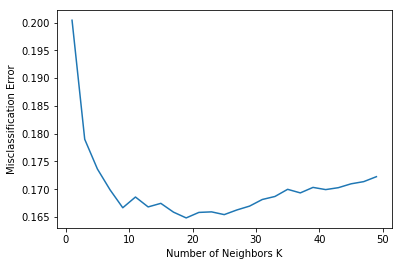

In [57]:
rangeList = list(range(1,50))
neighbors = filter(lambda x: x%2!=0,rangeList)
MSE = [1 - x for x in cv_scores]
MSE1 = MSE #assign MSE 
MSE = np.array(MSE).astype('float64')
neighbors = np.array(list(neighbors)).astype('float64')

plt.plot(neighbors, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()


#### Find optimum k value

In [140]:
optimum_k = neighbors[MSE1.index(min(MSE1))]
print('Optimum K:'+str(optimum_k))

Optimum K:19.0


#### Find the KNN algorithm with optimum k

In [145]:
knn = KNeighborsClassifier(n_neighbors=19)
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=19, p=2,
           weights='uniform')

In [146]:
y_predict = knn.predict(x_test)
y_expect = y_test

In [147]:
print(metrics.classification_report(y_expect,y_predict))

             precision    recall  f1-score   support

          0       0.70      0.57      0.63      2465
          1       0.87      0.92      0.89      7489

avg / total       0.83      0.83      0.83      9954



##### More precision + low recall is for good Predictor

#### predictor accuracy level

In [ ]:
accuracy_score(y_predict, y_expect)

In [ ]:
#this model has good accuracy level

# 2. Logistic Regression

In [112]:
#split into test and validation
x_val,x_test,y_val,y_test = train_test_split(x_test,y_test,test_size=.5)

In [148]:
#convert to the one hot encording format
y_val_one_hot = keras.utils.to_categorical(y_val,num_classes = 2)
y_train = keras.utils.to_categorical(y_train,num_classes =2)
y_test_one_hot = keras.utils.to_categorical(y_test,num_classes = 2)

array([[0., 1.],
       [0., 1.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [170]:
#crate the model
epochs = 20
batch_size = 110

model = Sequential()
model.add(Dense(2,input_dim = (13),activation='softmax'))
model.compile(optimizer= 'sgd',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [132]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 2)                 28        
Total params: 28
Trainable params: 28
Non-trainable params: 0
_________________________________________________________________


In [171]:
#train the model
model.fit(x_train,y_train, validation_data=(x_val, y_val_one_hot), batch_size=85,epochs=epochs)

Train on 20208 samples, validate on 1244 samples
Epoch 1/20
20208/20208 [==============================] - 1s 25us/step - loss: 0.6667 - acc: 0.6692 - val_loss: 0.4902 - val_acc: 0.7605
Epoch 2/20
20208/20208 [==============================] - 0s 14us/step - loss: 0.4517 - acc: 0.7884 - val_loss: 0.4203 - val_acc: 0.8087
Epoch 3/20
20208/20208 [==============================] - 0s 17us/step - loss: 0.4142 - acc: 0.8068 - val_loss: 0.4050 - val_acc: 0.8127
Epoch 4/20
20208/20208 [==============================] - 0s 17us/step - loss: 0.4042 - acc: 0.8096 - val_loss: 0.4004 - val_acc: 0.8119
Epoch 5/20
20208/20208 [==============================] - 0s 15us/step - loss: 0.4005 - acc: 0.8111 - val_loss: 0.3987 - val_acc: 0.8127
Epoch 6/20
20208/20208 [==============================] - 0s 16us/step - loss: 0.3989 - acc: 0.8118 - val_loss: 0.3981 - val_acc: 0.8135
Epoch 7/20
20208/20208 [==============================] - 0s 18us/step - loss: 0.3981 - acc: 0.8130 - val_loss: 0.3976 - val_acc:

In [180]:
evaluate = model.evaluate(x_test,y_test_one_hot,verbose=1)

9954/9954 [==============================] - 0s 15us/step


In [181]:
#calculating model accuracy rate
print('Model Loss Rate: ' +str(evaluate[0]))
print('Model accuracy Rate: ' +str(evaluate[1]))

Model Loss Rate: 0.3894591273937164
Model accuracy Rate: 0.8189672493469962


In [182]:
y_predict = model.predict(x_test)
y_expect = y_test_one_hot

In [183]:
y_predict

array([[0.02628084, 0.9737191 ],
       [0.03910474, 0.96089524],
       [0.1574343 , 0.8425657 ],
       ...,
       [0.6157402 , 0.38425976],
       [0.1038794 , 0.89612055],
       [0.7613911 , 0.2386089 ]], dtype=float32)

In [184]:
y_expect

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [0., 1.],
       [0., 1.],
       [1., 0.]], dtype=float32)

# 3. Neural Network